In [245]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


df = pd.read_csv('/content/Forecast-Data.csv', header=None)
df.columns = ['date', 'cost']

#Download Data & Import Library


In [246]:
df

,date,cost
0,2022-01-01,19209356
1,2022-02-01,18900447
2,2022-03-01,23981660
3,2022-04-01,21429391
4,2022-05-01,16398709
5,2022-06-01,26425150
6,2022-07-01,20968481
7,2022-08-01,21845345
8,2022-09-01,28388277
9,2022-10-01,18731270


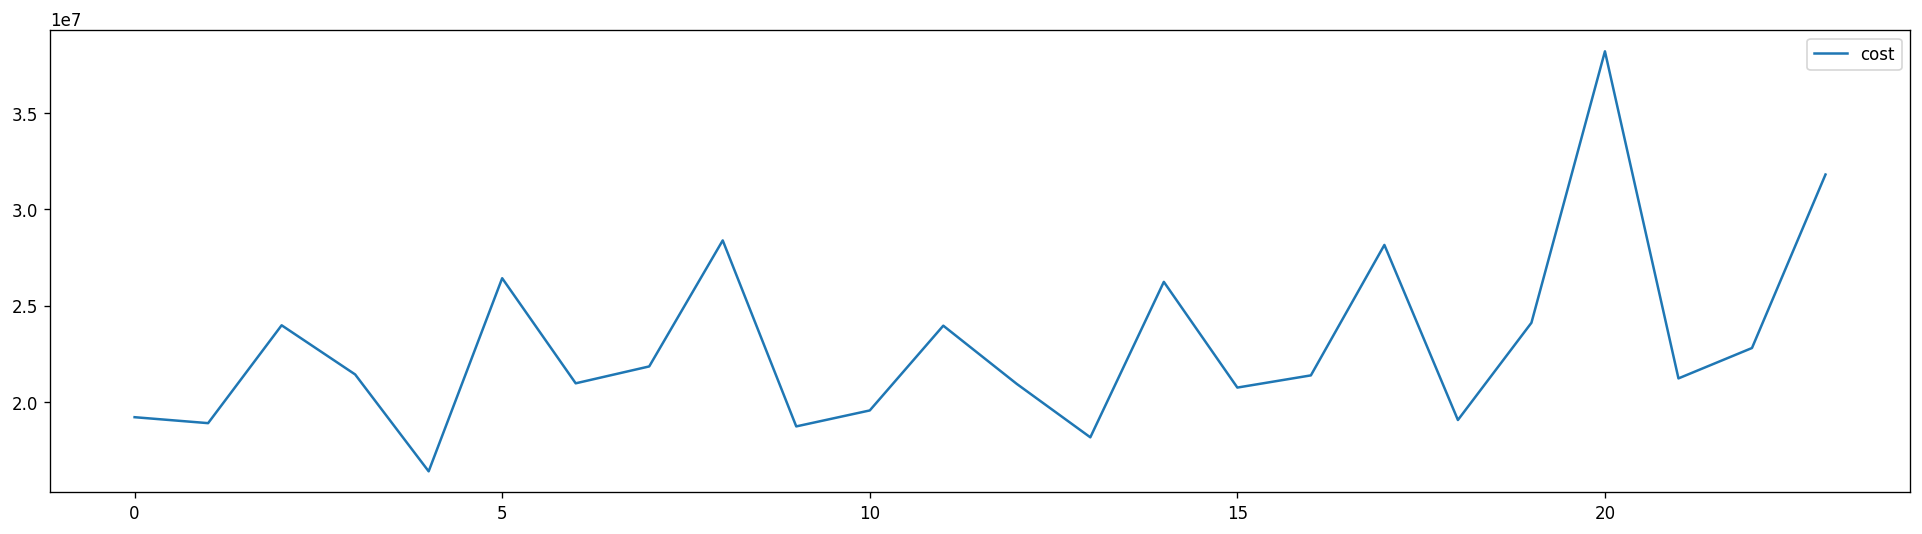

In [247]:
df['cost'].plot(figsize = (20, 5), legend = True);

#Visualization and find p, d, q


In [248]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(df['cost'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.148784
p-value: 0.695231
Critical Values:
	1%: -3.788
	5%: -3.013
	10%: -2.646


<Axes: >

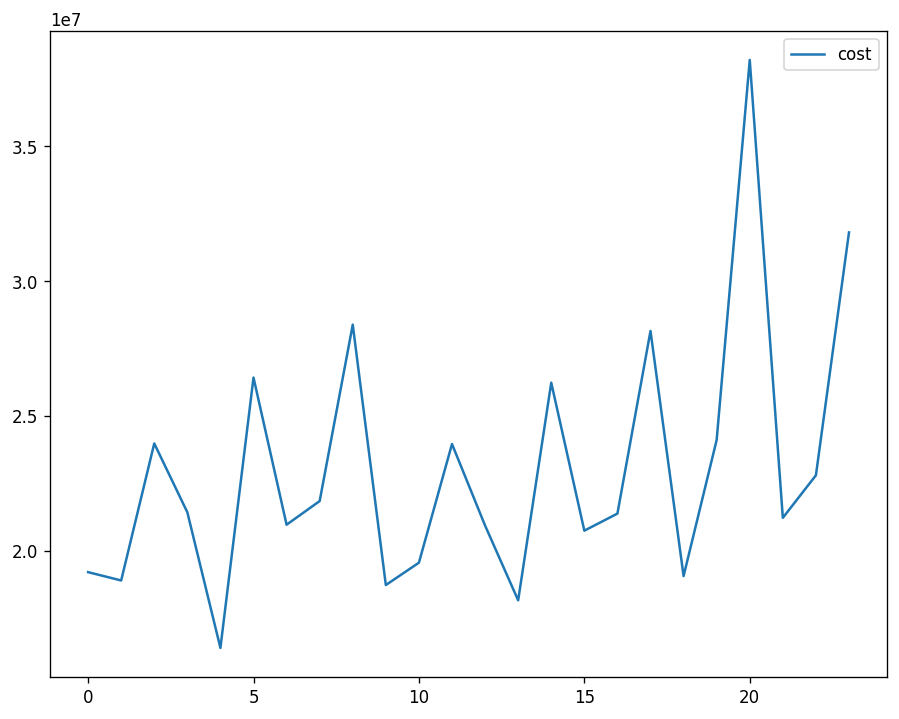

In [249]:
df.plot()

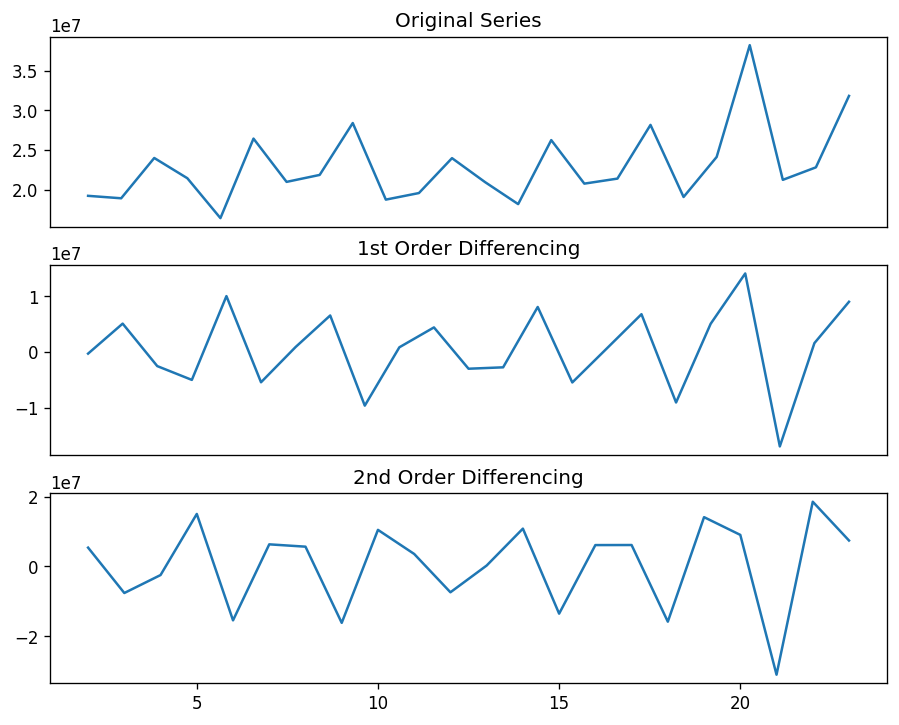

In [250]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df.cost); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)

# 1st Differencing
ax2.plot(df.cost.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)

# 2nd Differencing
ax3.plot(df.cost.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

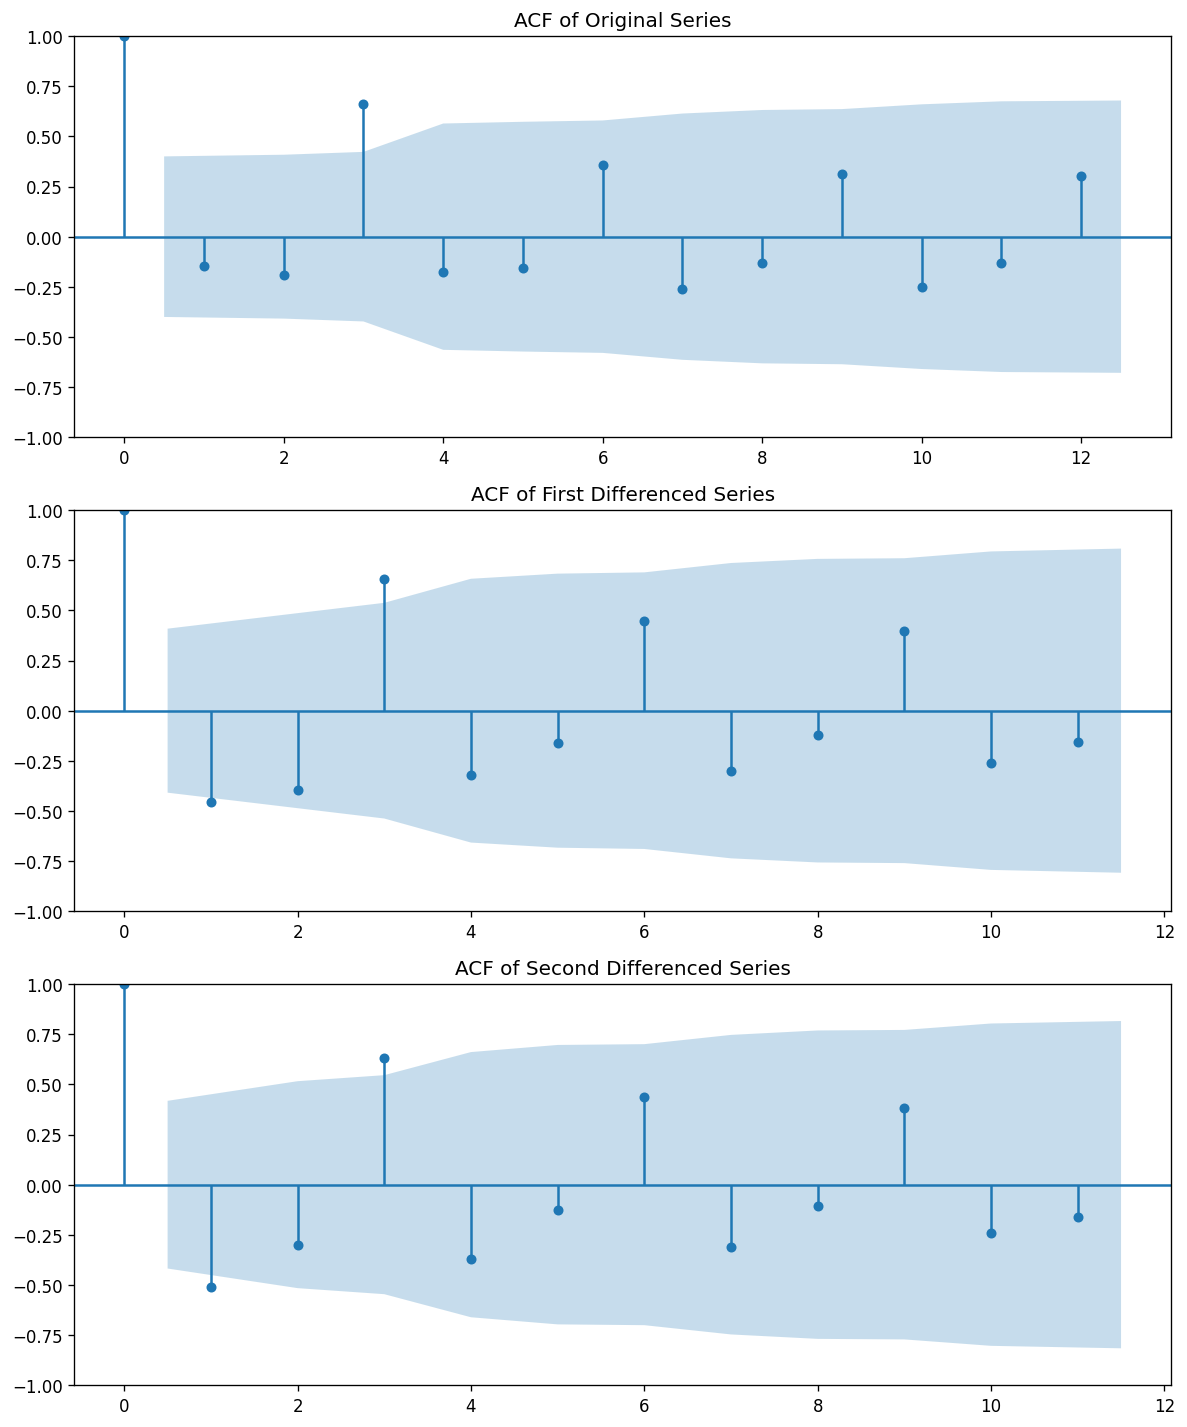

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot ACF for the original series
plot_acf(df['cost'], ax=ax1)
ax1.set_title('ACF of Original Series')

# Plot ACF for the first differenced series
plot_acf(df['cost'].diff().dropna(), ax=ax2)
ax2.set_title('ACF of First Differenced Series')

# Plot ACF for the second differenced series
plot_acf(df['cost'].diff().diff().dropna(), ax=ax3)
ax3.set_title('ACF of Second Differenced Series')

plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'PACF of Second Differenced Series')

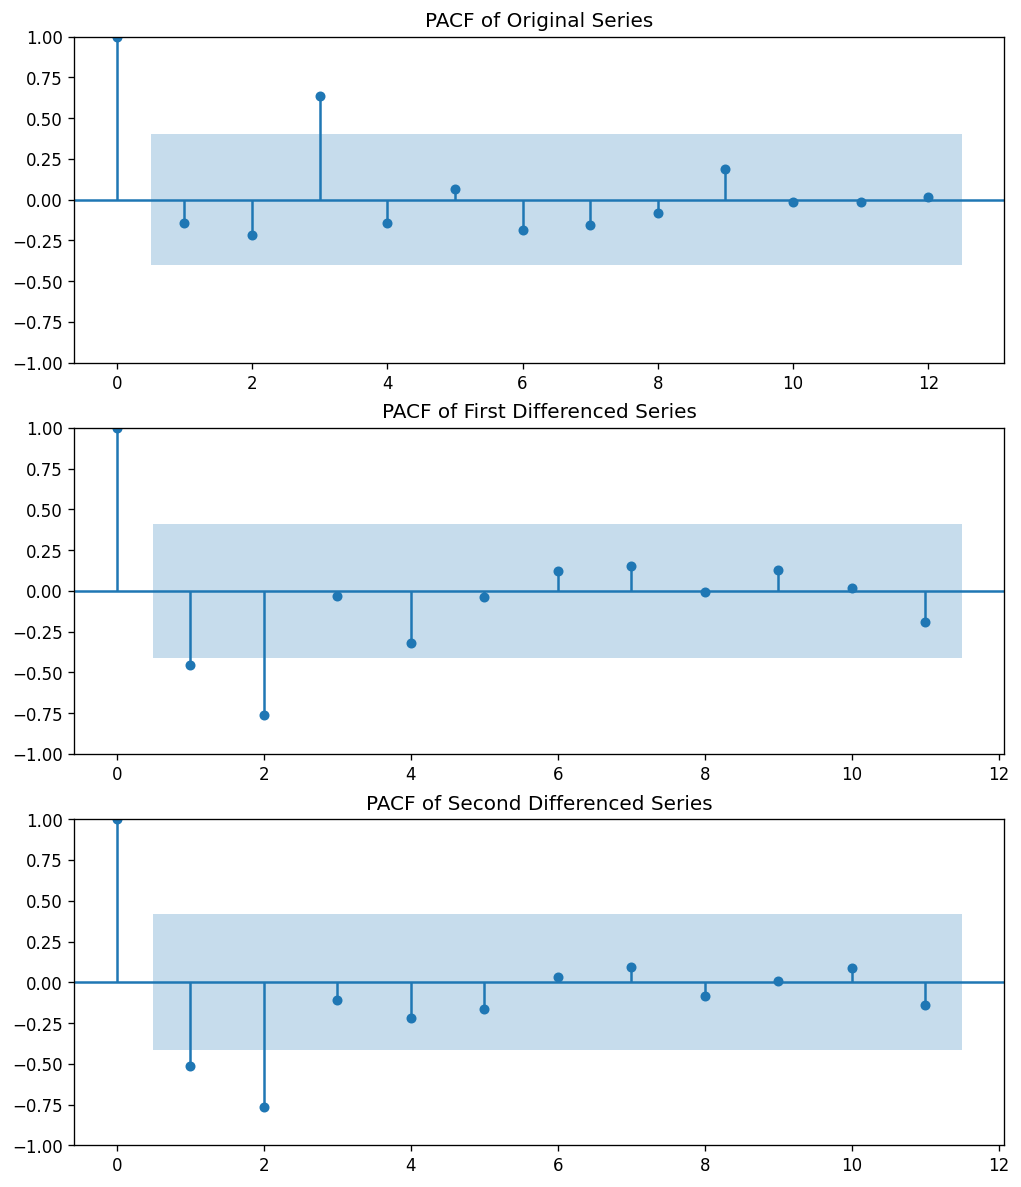

In [252]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot PACF for the original series
plot_pacf(df['cost'], ax=ax1)
ax1.set_title('PACF of Original Series')

# Plot PACF for the first differenced series
plot_pacf(df['cost'].diff().dropna(), ax=ax2)
ax2.set_title('PACF of First Differenced Series')

# Plot PACF for the second differenced series
plot_pacf(df['cost'].diff().diff().dropna(), ax=ax3)
ax3.set_title('PACF of Second Differenced Series')

#ARIMA Model

In [253]:
start = 6
predictions_list = [np.nan] * start

# Iteratively fit the model and forecast
for i in range(start, len(df)):
    subset = df['cost'].iloc[:i]
    model = ARIMA(subset, order=(9, 0, 3)) # 903 2.35e13
    model_fit = model.fit()
    prediction = model_fit.forecast(steps=1)

    predictions_list.append(int(prediction.round()))

# # Convert predictions to a DataFrame for better visualization
# results = pd.DataFrame({
#     'Prediction': predictions_list
# })

# # Display the results
# print(results)

# print(predictions_list)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
<ipython-input-253-30ffa588920c>:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  predictions_list.append(int(prediction.round()))
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
<ipython-input-253-30ffa588920c>:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  predictions

In [254]:
print(type(predictions_list[0]))

<class 'float'>


In [255]:
df['prediction'] = predictions_list

In [256]:
df

,date,cost,prediction
0,2022-01-01,19209356,NaN
1,2022-02-01,18900447,NaN
2,2022-03-01,23981660,NaN
3,2022-04-01,21429391,NaN
4,2022-05-01,16398709,NaN
5,2022-06-01,26425150,NaN
6,2022-07-01,20968481,19344106.0
7,2022-08-01,21845345,17390615.0
8,2022-09-01,28388277,19059343.0
9,2022-10-01,18731270,20518417.0


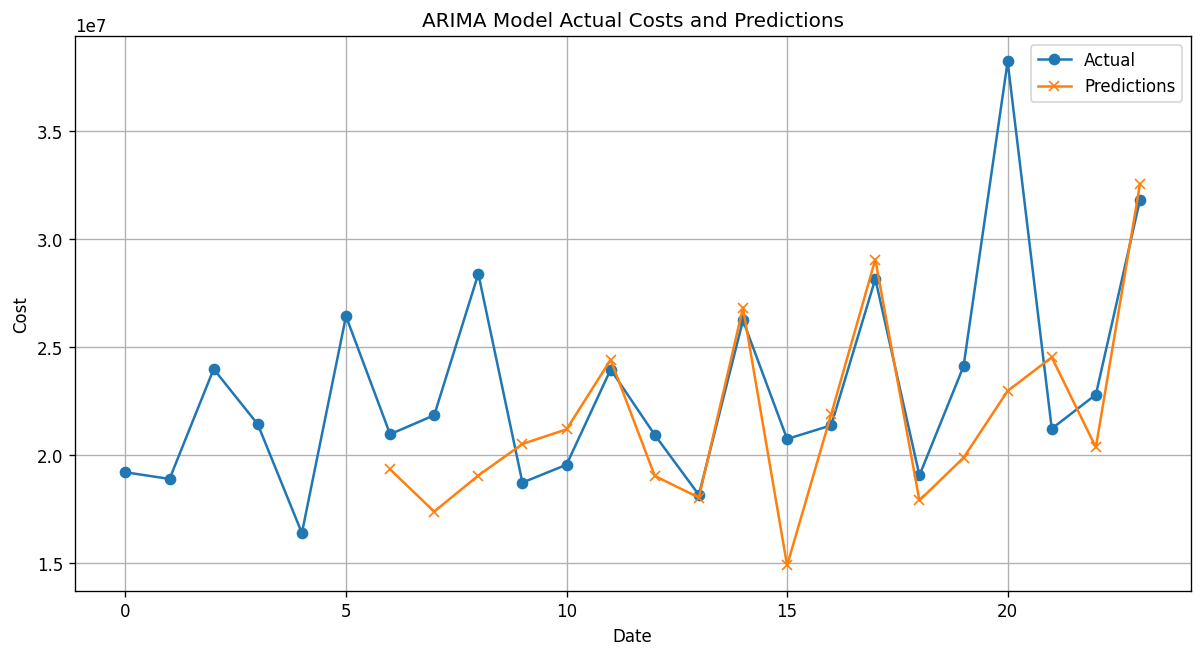

In [257]:
# Plot the actual cost and predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['cost'], label='Actual', marker='o')
plt.plot(df.index, df['prediction'], label='Predictions', marker='x')

plt.title('ARIMA Model Actual Costs and Predictions')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()

In [258]:
from sklearn.metrics import mean_squared_error

# Calculate MSE ignoring NaN values
valid_mask = ~df['prediction'].isna()
mse = mean_squared_error(df['cost'][valid_mask], df['prediction'][valid_mask])
print(f'Mean Squared Error: {mse:.2e}')

Mean Squared Error: 2.35e+13


In [259]:
model = ARIMA(df['cost'], order=(9, 0, 3))
model_fit = model.fit()
future_prediction = model_fit.forecast(steps=3)

future_prediction = future_prediction.round()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [260]:
df = pd.concat([df, future_prediction], axis=1)

In [261]:
df['prediction'].fillna(df['predicted_mean'], inplace=True)

df.drop(columns=['predicted_mean'], inplace=True)

In [262]:
df

,date,cost,prediction
0,2022-01-01,19209356.0,NaN
1,2022-02-01,18900447.0,NaN
2,2022-03-01,23981660.0,NaN
3,2022-04-01,21429391.0,NaN
4,2022-05-01,16398709.0,NaN
5,2022-06-01,26425150.0,NaN
6,2022-07-01,20968481.0,19344106.0
7,2022-08-01,21845345.0,17390615.0
8,2022-09-01,28388277.0,19059343.0
9,2022-10-01,18731270.0,20518417.0


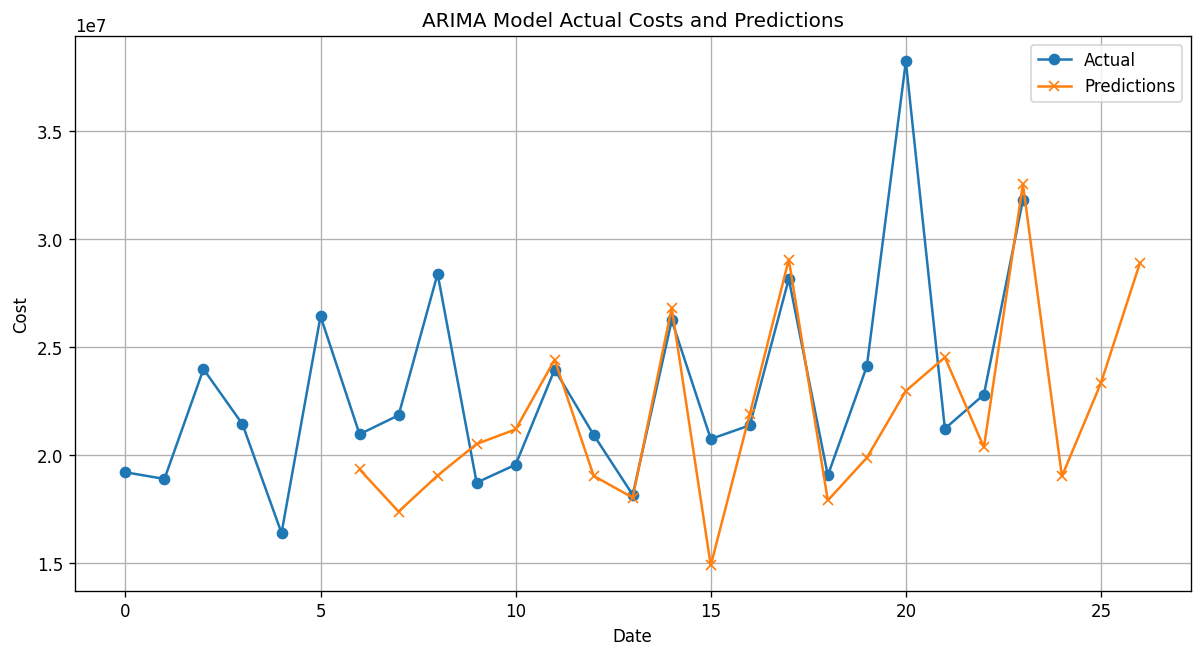

In [263]:
# Plot the actual cost and predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['cost'], label='Actual', marker='o')
plt.plot(df.index, df['prediction'], label='Predictions', marker='x')

plt.title('ARIMA Model Actual Costs and Predictions')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()